# Introduction

Dataset can be downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

The column names are contained in the following file https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

The original paper which published the dataset can be found here http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf

The census from which the dataset was built https://www2.census.gov/library/publications/decennial/1970/phc-1/39204513p3ch05.pdf

# Describe

In [1]:
# Import package that will enable opening of names file from url
from urllib.request import urlopen

# Open the names file and assign it to data
data = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names")

# Adapted from https://bugs.python.org/issue5419
# Decode the content of the names file and print the output
print(data.read().decode('utf-8'))

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

In [2]:
# Importing pandas
import pandas as pd

# Reading the tab-delimited dataset into a DataFile and adding column names from the housing.names file shown above
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])

# Viewing the first five rows of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualising the dataset

### Scatter plots

The MEDV is the variable that we will be trying to predict using the keras machine learning library.

From the scatter plot below, there appears to be a negative correlation with house prices and the following: CRIM, INDUS, NOX, LSTAT, PTRATIO and possibly TAX.

There appears to be a positive correlation between house prices and RM

In [3]:
# Adapted from https://github.com/Tsmith5151/Boston-Housing-Prices/blob/master/boston_housing.ipynb
import matplotlib.pyplot as plt

plt.figure()
fig,axes = plt.subplots(5, 3, figsize=(14, 16))
fig.subplots_adjust(wspace=.2, hspace=.4)
img_index = 0

rows, cols = df.shape

for i in range(cols - 1):
    row, col = i // 3, i % 3
    axes[row][col].scatter(df.iloc[:, i], df.loc[:, "MEDV"], alpha=0.5, s=10)
    axes[row][col].set_title(df.columns[i] + ' and MEDV')
    axes[row][col].set_xlabel(df.columns[i])        
    axes[row][col].set_ylabel('MEDV')
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 1400x1600 with 15 Axes>

### Creating a correlation heat map

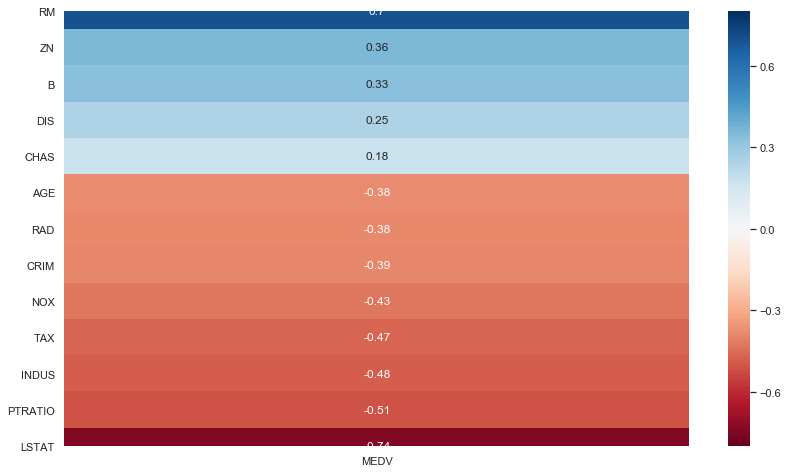

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a correlation matrix
corr = df.corr()

# Reducing the correlation matrix to a single column, and 12 rows (not showing MEDV vs MEDV)
corr = pd.DataFrame(corr["MEDV"][0:13])

# Setting the size of the heat map
sns.set(rc={'figure.figsize':(14,8)})

# Sorting corr in descending order
corrSorted = corr.sort_values(by=["MEDV"], ascending=False)

# Creating the correlation heatmap
sns.heatmap(corrSorted, annot=True, cmap='RdBu', vmin=-0.8, vmax=0.8)

# Showing the heatmap
plt.show()

### Deciding which variables to look at

From the above the variables that strongly correlate with MEDV (either positively or negatively) are LSTAT (-0.74),PTRATIO (-0.51) and RM (0.70). These are the variables that I will use later on to build a prediction model to predict the median house price. I will also look at CHAS as the next section looks at using inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that are not.

### Summary statistics

In [5]:
df2 = df[["MEDV", "PTRATIO", "RM", "INDUS", "CHAS"]]

df2.describe()

,MEDV,PTRATIO,RM,INDUS,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,18.455534,6.284634,11.136779,0.069170
std,9.197104,2.164946,0.702617,6.860353,0.253994
min,5.000000,12.600000,3.561000,0.460000,0.000000
25%,17.025000,17.400000,5.885500,5.190000,0.000000
50%,21.200000,19.050000,6.208500,9.690000,0.000000
75%,25.000000,20.200000,6.623500,18.100000,0.000000
max,50.000000,22.000000,8.780000,27.740000,1.000000


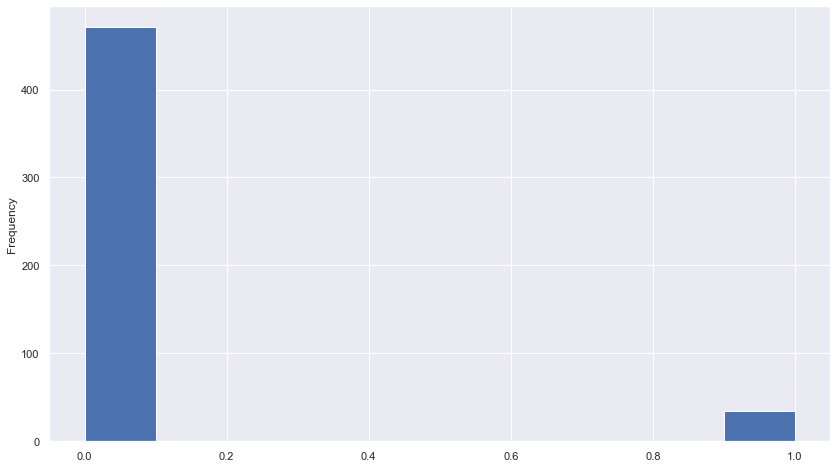

In [6]:
# Displaying the frequency of houses that are on/not on Charles river
df2["CHAS"].plot.hist()

## Inferential Statistics

We are interested in determining if there is a significant difference in house prices between houses that are along the Charles River and those that aren't. The Boston House Prices dataset does not contain the data for the entire population of houses in Boston but instead contains a sample which are the median values for each town. We can use inferential statistics to make inferences about the population from the sample data [towardsdatascience-Inferential Statistics for Data Science](https://towardsdatascience.com/inferential-statistics-for-data-science-b0075670fc8a). Inferential statistics can be used to determine the probability that there is a true relationship between two variables [Science Direct-Inferential Statistics](https://www.sciencedirect.com/topics/medicine-and-dentistry/inferential-statistics).  

### Selecting an appropriate test



#### Requirements for a Student t-test

Before conducting a t-test we will first examine if doing a t-test in this case is appropriate. 

(need reference to list of requirements for t-test)


MEDV distribution for tracts along Charles River and MEDV distribution for tracts not along Charles River.

As the two CHAS variables are independent of each other then an independent t-test should be used as apposed to .....

There will be only one comparison made: MEDV for CHAS = 0 and MEDV for CHAS = 1. As there is only one comparison to be made an ANOVA isn't necessary in this case and a t-test will be sufficient.


...........

Unequal sample sizes and different variances, therefore Student t-test is not appropriate

#### Requirements for a Welch t-test
Welch test can be used in place of the student t-test where the variance and/or sample sizes differ.


However, as seen below the distributions are not normal which is also a requirement for the Welch test **give reference**

#### Non-Parametric Data

As the data is not normally distributed a non-parametric test should be used. [University of Minnesota-Types of Statistical Test](https://cyfar.org/types-statistical-tests). The Mann-Whitney U test (or Wilcoxon rank-sum test) can be used for non-para-metric data to test for the difference between two independent variables.[University of Minnesota-Types of Statistical Test](https://cyfar.org/types-statistical-tests)


#### Visualising the data to determine if they are normally distributed

In [7]:
# Importing seaborn to create distplots
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


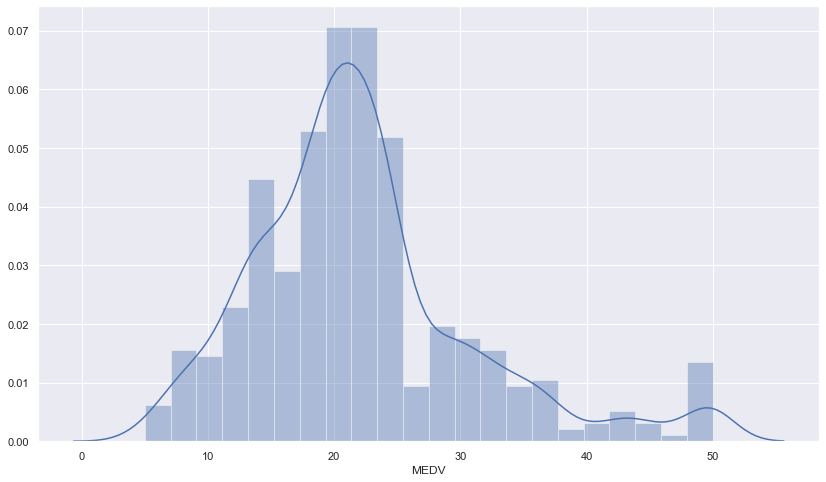

In [8]:
# Displot for tract not along Charles River
sns.distplot(df["MEDV"][df["CHAS"] == 0])

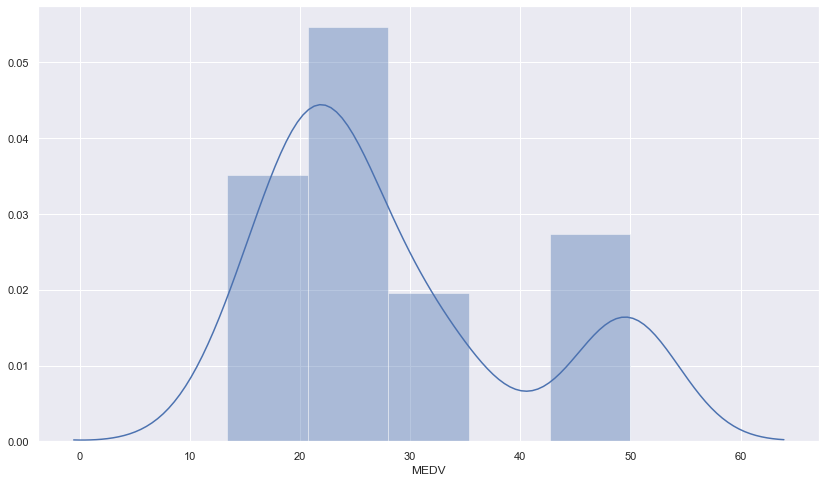

In [9]:
# Displot for tract along Charles River
sns.distplot(df["MEDV"][df["CHAS"] == 1])

In [10]:
# Importing stats module from scipy
from scipy import stats

# Determining if the distribution for tracts along Charles River are normal
stats.shapiro(df["MEDV"][df["CHAS"] == 1])

(0.8359232544898987, 0.00011230883683310822)

In [11]:
# Determining if the distribution for tracts not along the Charles River are normal
stats.shapiro(df["MEDV"][df["CHAS"] == 0])

(0.9282605051994324, 3.113930960958397e-14)

In [12]:
# Determining the mean for both groups
df["MEDV"].groupby(df["CHAS"]).mean()

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64

In [13]:
# Determining the count for both groups
df["MEDV"].groupby(df["CHAS"]).count()

CHAS
0    471
1     35
Name: MEDV, dtype: int64

In [14]:
# Determining the variance for both groups
df["MEDV"].groupby(df["CHAS"]).var()

CHAS
0     77.992962
1    139.633059
Name: MEDV, dtype: float64

In [15]:
# Determining the standard deviation for both groups
df["MEDV"].groupby(df["CHAS"]).std()

CHAS
0     8.831362
1    11.816643
Name: MEDV, dtype: float64

### Student t-test

The p-value for the Student t-test is less than 0.05 which strongly suggests that the sample distributions are different.

In [16]:
# Code for Student t-test

from scipy.stats import ttest_ind as tti

stti_stat, stti_p = tti(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1], equal_var=True)

stti_p

7.390623170519905e-05

### Welch t-test

The p-value for the Welch t-test is less than 0.05 which strongly suggests that the sample distributions are different.

In [17]:
# Code for Welch t-test

from scipy.stats import ttest_ind as tti

wtti_stat, wtti_p = tti(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1], equal_var=False)

wtti_p

0.003567170098137517

### Mann-Whitney U test 

The p-value for the Mann-Whitney U test is less than 0.05 which strongly suggests that the sample distributions are different.

In [18]:
# Code for Mann-Whitney U test

from scipy.stats import mannwhitneyu as mwu

mwu(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1])

MannwhitneyuResult(statistic=5605.5, pvalue=0.0007908352505647487)

### Hypothesis testing

## Predict

This is a regression predictive modeling problem. Regression predictive modeling problems involve predicting a real-valued quantity [machinelearningmastery - How to Choose Loss Functions When Training Deep Learning Neural Networks](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

### Preparing the data for the neural network

Creating separate columns for true and false values for CHAS

In [19]:
import numpy as np


# Adapted from course materials
df["CHAS_True"] = df["CHAS"]
df["CHAS_False"] = (df["CHAS"] == 0).astype(np.int)

Separating the data into the independent variables 'PTRATIO', 'RM' and 'INDUS' and the target variable 'MEDV'

In [20]:
# Input/independent variables

X = df.drop(columns=["MEDV", "CHAS"])#X = df[["PTRATIO", "RM", "INDUS"]]

# Output/dependent variable

y = df["MEDV"]

In [21]:
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,0,1
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,0,1
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,0,1
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,0,1
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,0,1


In [22]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

#### Splitting datasets into random train and test subsets

Setting the test size to 33% of the dataset

In [23]:
# Importing train test split from sklearn
from sklearn.model_selection import train_test_split

# Splitting the output and input datasets into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [24]:
X_train

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
57,0.01432,100.0,1.32,0.411,6.816,40.5,8.3248,5,256.0,15.1,392.90,3.95,0,1
442,5.66637,0.0,18.10,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,0,1
364,3.47428,0.0,18.10,0.718,8.780,82.9,1.9047,24,666.0,20.2,354.55,5.29,1,0
225,0.52693,0.0,6.20,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,0,1
495,0.17899,0.0,9.69,0.585,5.670,28.8,2.7986,6,391.0,19.2,393.29,17.60,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0.80271,0.0,8.14,0.538,5.456,36.6,3.7965,4,307.0,21.0,288.99,11.69,0,1
222,0.62356,0.0,6.20,0.507,6.879,77.7,3.2721,8,307.0,17.4,390.39,9.93,1,0
473,4.64689,0.0,18.10,0.614,6.980,67.6,2.5329,24,666.0,20.2,374.68,11.66,0,1
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,0,1


In [25]:
X_test

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
419,11.81230,0.0,18.10,0.718,6.824,76.5,1.7940,24,666.0,20.2,48.45,22.74,0,1
273,0.22188,20.0,6.96,0.464,7.691,51.8,4.3665,3,223.0,18.6,390.77,6.58,1,0
10,0.22489,12.5,7.87,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,0,1
40,0.03359,75.0,2.95,0.428,7.024,15.8,5.4011,3,252.0,18.3,395.62,1.98,0,1
251,0.21409,22.0,5.86,0.431,6.438,8.9,7.3967,7,330.0,19.1,377.07,3.59,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,9.39063,0.0,18.10,0.740,5.627,93.9,1.8172,24,666.0,20.2,396.90,22.88,0,1
385,16.81180,0.0,18.10,0.700,5.277,98.1,1.4261,24,666.0,20.2,396.90,30.81,0,1
99,0.06860,0.0,2.89,0.445,7.416,62.5,3.4952,2,276.0,18.0,396.90,6.19,0,1
269,0.09065,20.0,6.96,0.464,5.920,61.5,3.9175,3,223.0,18.6,391.34,13.65,1,0


In [26]:
y_train

57     31.6
442    18.4
364    21.9
225    50.0
495    23.1
       ... 
18     20.2
222    27.5
473    29.8
1      21.6
85     26.6
Name: MEDV, Length: 339, dtype: float64

In [27]:
y_test

419     8.4
273    35.2
10     15.0
40     34.9
251    24.8
       ... 
439    12.8
385     7.2
99     33.2
269    20.7
254    21.9
Name: MEDV, Length: 167, dtype: float64

### Defining the neural net

There are 3 input variables so the input_dim below is set to 3. Experimenting with 1.5 times more hidden nodes in the first layer compared to the input layer. Second hidden layer has the same number of nodes (4) as the input layer. All layers are using the ReLU activation function. **(Why and explanation of ReLU)**

In [28]:
# Adapted from https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

# Importing packages
from keras.models import Sequential
from keras.layers import Dense

# Defining the neural network
model = Sequential()
model.add(Dense(28, input_dim=14, activation='elu'))
model.add(Dense(14, activation='elu'))
model.add(Dense(1, activation='elu'))


Using TensorFlow backend.


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 14)                406       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


### Compiling the neural net

As this is a regression problem, a Regression Loss Function will be used. Initially setting this to a Mean Squared Error Loss fuction.

In [30]:
# Compiling the neural net
model.compile(loss='mean_squared_error', optimizer='adam')

### Fitting the neural net to the training dataset

In [31]:
# Fitting the neural net

model.fit(X_train.values, y_train.values, epochs=1500, batch_size=8)

Epoch 1/1500
339/339 [==============================] - 0s 1ms/step - loss: 189.1534
Epoch 2/1500
339/339 [==============================] - 0s 233us/step - loss: 83.9252
Epoch 3/1500
339/339 [==============================] - 0s 256us/step - loss: 76.6738
Epoch 4/1500
339/339 [==============================] - 0s 239us/step - loss: 67.3982
Epoch 5/1500
339/339 [==============================] - 0s 239us/step - loss: 66.2885
Epoch 6/1500
339/339 [==============================] - 0s 245us/step - loss: 66.7543
Epoch 7/1500
339/339 [==============================] - 0s 256us/step - loss: 59.7963
Epoch 8/1500
339/339 [==============================] - 0s 254us/step - loss: 79.4635
Epoch 9/1500
339/339 [==============================] - 0s 307us/step - loss: 60.5115
Epoch 10/1500
339/339 [==============================] - 0s 262us/step - loss: 61.4965
Epoch 11/1500
339/339 [==============================] - 0s 386us/step - loss: 61.0023
Epoch 12/1500
339/339 [==============================

339/339 [==============================] - 0s 256us/step - loss: 26.8515
Epoch 96/1500
339/339 [==============================] - 0s 259us/step - loss: 25.7715
Epoch 97/1500
339/339 [==============================] - 0s 307us/step - loss: 26.4595
Epoch 98/1500
339/339 [==============================] - 0s 310us/step - loss: 27.4963
Epoch 99/1500
339/339 [==============================] - 0s 221us/step - loss: 26.6796
Epoch 100/1500
339/339 [==============================] - 0s 218us/step - loss: 25.9127
Epoch 101/1500
339/339 [==============================] - 0s 224us/step - loss: 24.4911
Epoch 102/1500
339/339 [==============================] - 0s 228us/step - loss: 25.0604
Epoch 103/1500
339/339 [==============================] - 0s 230us/step - loss: 22.6103
Epoch 104/1500
339/339 [==============================] - 0s 233us/step - loss: 26.8223
Epoch 105/1500
339/339 [==============================] - 0s 236us/step - loss: 24.8751
Epoch 106/1500
339/339 [===========================

Epoch 188/1500
339/339 [==============================] - 0s 262us/step - loss: 16.2519
Epoch 189/1500
339/339 [==============================] - 0s 236us/step - loss: 17.1765
Epoch 190/1500
339/339 [==============================] - 0s 221us/step - loss: 17.2180
Epoch 191/1500
339/339 [==============================] - 0s 227us/step - loss: 16.3696
Epoch 192/1500
339/339 [==============================] - 0s 271us/step - loss: 19.8850
Epoch 193/1500
339/339 [==============================] - 0s 239us/step - loss: 18.1771
Epoch 194/1500
339/339 [==============================] - 0s 236us/step - loss: 16.8050
Epoch 195/1500
339/339 [==============================] - 0s 227us/step - loss: 18.1322
Epoch 196/1500
339/339 [==============================] - 0s 233us/step - loss: 15.8645
Epoch 197/1500
339/339 [==============================] - 0s 242us/step - loss: 20.0681
Epoch 198/1500
339/339 [==============================] - 0s 271us/step - loss: 17.4132
Epoch 199/1500
339/339 [========

339/339 [==============================] - 0s 265us/step - loss: 16.7302
Epoch 281/1500
339/339 [==============================] - 0s 256us/step - loss: 14.6024
Epoch 282/1500
339/339 [==============================] - 0s 227us/step - loss: 15.2396
Epoch 283/1500
339/339 [==============================] - 0s 227us/step - loss: 14.9464
Epoch 284/1500
339/339 [==============================] - 0s 221us/step - loss: 14.8073
Epoch 285/1500
339/339 [==============================] - 0s 254us/step - loss: 16.5681
Epoch 286/1500
339/339 [==============================] - ETA: 0s - loss: 14.87 - 0s 274us/step - loss: 15.4266
Epoch 287/1500
339/339 [==============================] - 0s 254us/step - loss: 23.0061
Epoch 288/1500
339/339 [==============================] - 0s 233us/step - loss: 18.6858
Epoch 289/1500
339/339 [==============================] - 0s 248us/step - loss: 16.3577
Epoch 290/1500
339/339 [==============================] - 0s 224us/step - loss: 16.3775
Epoch 291/1500
339/339 

339/339 [==============================] - 0s 268us/step - loss: 13.7673
Epoch 373/1500
339/339 [==============================] - 0s 256us/step - loss: 13.1702
Epoch 374/1500
339/339 [==============================] - 0s 233us/step - loss: 14.1843
Epoch 375/1500
339/339 [==============================] - 0s 271us/step - loss: 16.3445
Epoch 376/1500
339/339 [==============================] - 0s 304us/step - loss: 14.9112
Epoch 377/1500
339/339 [==============================] - 0s 310us/step - loss: 12.7100
Epoch 378/1500
339/339 [==============================] - 0s 354us/step - loss: 14.3688
Epoch 379/1500
339/339 [==============================] - 0s 277us/step - loss: 13.1576
Epoch 380/1500
339/339 [==============================] - 0s 265us/step - loss: 13.9186
Epoch 381/1500
339/339 [==============================] - ETA: 0s - loss: 14.20 - 0s 262us/step - loss: 13.0173
Epoch 382/1500
339/339 [==============================] - 0s 230us/step - loss: 12.8368
Epoch 383/1500
339/339 

Epoch 465/1500
339/339 [==============================] - 0s 230us/step - loss: 12.7856
Epoch 466/1500
339/339 [==============================] - 0s 215us/step - loss: 12.8519
Epoch 467/1500
339/339 [==============================] - 0s 259us/step - loss: 12.8729
Epoch 468/1500
339/339 [==============================] - 0s 224us/step - loss: 12.6854
Epoch 469/1500
339/339 [==============================] - 0s 218us/step - loss: 12.8644
Epoch 470/1500
339/339 [==============================] - 0s 218us/step - loss: 12.4317
Epoch 471/1500
339/339 [==============================] - 0s 251us/step - loss: 12.5264
Epoch 472/1500
339/339 [==============================] - 0s 254us/step - loss: 12.1115
Epoch 473/1500
339/339 [==============================] - 0s 298us/step - loss: 12.8707
Epoch 474/1500
339/339 [==============================] - 0s 224us/step - loss: 13.4023
Epoch 475/1500
339/339 [==============================] - 0s 233us/step - loss: 12.7511
Epoch 476/1500
339/339 [========

339/339 [==============================] - 0s 310us/step - loss: 12.9437
Epoch 558/1500
339/339 [==============================] - 0s 262us/step - loss: 12.2324
Epoch 559/1500
339/339 [==============================] - 0s 262us/step - loss: 12.5750
Epoch 560/1500
339/339 [==============================] - 0s 254us/step - loss: 12.3968
Epoch 561/1500
339/339 [==============================] - 0s 227us/step - loss: 10.5310
Epoch 562/1500
339/339 [==============================] - 0s 212us/step - loss: 11.9374
Epoch 563/1500
339/339 [==============================] - 0s 224us/step - loss: 11.0118
Epoch 564/1500
339/339 [==============================] - 0s 239us/step - loss: 10.7769
Epoch 565/1500
339/339 [==============================] - 0s 245us/step - loss: 10.9754
Epoch 566/1500
339/339 [==============================] - 0s 236us/step - loss: 10.9507
Epoch 567/1500
339/339 [==============================] - 0s 239us/step - loss: 11.8578
Epoch 568/1500
339/339 [=======================

Epoch 650/1500
339/339 [==============================] - 0s 304us/step - loss: 9.1012
Epoch 651/1500
339/339 [==============================] - 0s 295us/step - loss: 11.6386
Epoch 652/1500
339/339 [==============================] - 0s 292us/step - loss: 11.2361
Epoch 653/1500
339/339 [==============================] - 0s 316us/step - loss: 13.7218
Epoch 654/1500
339/339 [==============================] - 0s 298us/step - loss: 12.3074
Epoch 655/1500
339/339 [==============================] - 0s 256us/step - loss: 11.7877
Epoch 656/1500
339/339 [==============================] - 0s 277us/step - loss: 10.1972
Epoch 657/1500
339/339 [==============================] - 0s 236us/step - loss: 10.6617
Epoch 658/1500
339/339 [==============================] - 0s 233us/step - loss: 10.7364
Epoch 659/1500
339/339 [==============================] - 0s 298us/step - loss: 10.0233
Epoch 660/1500
339/339 [==============================] - 0s 321us/step - loss: 9.6082
Epoch 661/1500
339/339 [==========

339/339 [==============================] - 0s 230us/step - loss: 9.1507
Epoch 744/1500
339/339 [==============================] - 0s 256us/step - loss: 9.6755
Epoch 745/1500
339/339 [==============================] - 0s 239us/step - loss: 10.0241
Epoch 746/1500
339/339 [==============================] - 0s 256us/step - loss: 10.3845
Epoch 747/1500
339/339 [==============================] - 0s 242us/step - loss: 10.0987
Epoch 748/1500
339/339 [==============================] - 0s 259us/step - loss: 9.3646
Epoch 749/1500
339/339 [==============================] - 0s 256us/step - loss: 9.7638
Epoch 750/1500
339/339 [==============================] - 0s 219us/step - loss: 9.5078
Epoch 751/1500
339/339 [==============================] - 0s 230us/step - loss: 9.6883
Epoch 752/1500
339/339 [==============================] - 0s 271us/step - loss: 10.6124
Epoch 753/1500
339/339 [==============================] - 0s 283us/step - loss: 10.8490
Epoch 754/1500
339/339 [=============================

339/339 [==============================] - 0s 230us/step - loss: 7.4569
Epoch 837/1500
339/339 [==============================] - 0s 251us/step - loss: 7.4310
Epoch 838/1500
339/339 [==============================] - 0s 295us/step - loss: 9.2403
Epoch 839/1500
339/339 [==============================] - 0s 265us/step - loss: 7.7661
Epoch 840/1500
339/339 [==============================] - 0s 259us/step - loss: 9.0340
Epoch 841/1500
339/339 [==============================] - 0s 268us/step - loss: 8.2857
Epoch 842/1500
339/339 [==============================] - 0s 248us/step - loss: 9.6866
Epoch 843/1500
339/339 [==============================] - 0s 236us/step - loss: 8.1821
Epoch 844/1500
339/339 [==============================] - 0s 248us/step - loss: 7.9489
Epoch 845/1500
339/339 [==============================] - 0s 242us/step - loss: 11.4441
Epoch 846/1500
339/339 [==============================] - 0s 286us/step - loss: 9.5816
Epoch 847/1500
339/339 [==============================] -

Epoch 930/1500
339/339 [==============================] - 0s 248us/step - loss: 8.3887
Epoch 931/1500
339/339 [==============================] - 0s 236us/step - loss: 6.6890
Epoch 932/1500
339/339 [==============================] - 0s 218us/step - loss: 7.1720
Epoch 933/1500
339/339 [==============================] - 0s 227us/step - loss: 7.1368
Epoch 934/1500
339/339 [==============================] - 0s 233us/step - loss: 7.0655
Epoch 935/1500
339/339 [==============================] - 0s 233us/step - loss: 6.9595
Epoch 936/1500
339/339 [==============================] - 0s 245us/step - loss: 6.5928
Epoch 937/1500
339/339 [==============================] - 0s 224us/step - loss: 8.4451
Epoch 938/1500
339/339 [==============================] - 0s 236us/step - loss: 6.5461
Epoch 939/1500
339/339 [==============================] - 0s 286us/step - loss: 6.5921
Epoch 940/1500
339/339 [==============================] - 0s 392us/step - loss: 7.5977
Epoch 941/1500
339/339 [===================

339/339 [==============================] - 0s 307us/step - loss: 7.5330
Epoch 1024/1500
339/339 [==============================] - 0s 286us/step - loss: 8.7156
Epoch 1025/1500
339/339 [==============================] - 0s 315us/step - loss: 7.2045
Epoch 1026/1500
339/339 [==============================] - 0s 310us/step - loss: 6.9862
Epoch 1027/1500
339/339 [==============================] - 0s 289us/step - loss: 6.5359
Epoch 1028/1500
339/339 [==============================] - 0s 339us/step - loss: 5.9443
Epoch 1029/1500
339/339 [==============================] - 0s 377us/step - loss: 7.2146
Epoch 1030/1500
339/339 [==============================] - 0s 404us/step - loss: 6.3506
Epoch 1031/1500
339/339 [==============================] - 0s 345us/step - loss: 6.2451
Epoch 1032/1500
339/339 [==============================] - 0s 304us/step - loss: 6.2227
Epoch 1033/1500
339/339 [==============================] - 0s 292us/step - loss: 7.5333
Epoch 1034/1500
339/339 [=======================

339/339 [==============================] - 0s 330us/step - loss: 5.6968
Epoch 1117/1500
339/339 [==============================] - 0s 307us/step - loss: 9.1865
Epoch 1118/1500
339/339 [==============================] - 0s 339us/step - loss: 5.7923
Epoch 1119/1500
339/339 [==============================] - 0s 307us/step - loss: 6.2607
Epoch 1120/1500
339/339 [==============================] - 0s 345us/step - loss: 6.8777
Epoch 1121/1500
339/339 [==============================] - 0s 315us/step - loss: 9.8432
Epoch 1122/1500
339/339 [==============================] - 0s 289us/step - loss: 6.5613
Epoch 1123/1500
339/339 [==============================] - 0s 292us/step - loss: 6.4597
Epoch 1124/1500
339/339 [==============================] - 0s 295us/step - loss: 6.3343
Epoch 1125/1500
339/339 [==============================] - 0s 304us/step - loss: 6.1202
Epoch 1126/1500
339/339 [==============================] - 0s 283us/step - loss: 6.1845
Epoch 1127/1500
339/339 [=======================

339/339 [==============================] - 0s 298us/step - loss: 5.3649
Epoch 1209/1500
339/339 [==============================] - 0s 313us/step - loss: 5.7096
Epoch 1210/1500
339/339 [==============================] - 0s 271us/step - loss: 6.1395
Epoch 1211/1500
339/339 [==============================] - 0s 277us/step - loss: 5.3219
Epoch 1212/1500
339/339 [==============================] - 0s 315us/step - loss: 6.6732
Epoch 1213/1500
339/339 [==============================] - 0s 292us/step - loss: 6.6601
Epoch 1214/1500
339/339 [==============================] - 0s 274us/step - loss: 7.1860
Epoch 1215/1500
339/339 [==============================] - 0s 307us/step - loss: 6.0727
Epoch 1216/1500
339/339 [==============================] - 0s 307us/step - loss: 5.8932
Epoch 1217/1500
339/339 [==============================] - 0s 280us/step - loss: 7.8687
Epoch 1218/1500
339/339 [==============================] - 0s 292us/step - loss: 7.2018
Epoch 1219/1500
339/339 [=======================

339/339 [==============================] - 0s 386us/step - loss: 8.7576
Epoch 1302/1500
339/339 [==============================] - 0s 389us/step - loss: 5.9743
Epoch 1303/1500
339/339 [==============================] - 0s 392us/step - loss: 4.9148
Epoch 1304/1500
339/339 [==============================] - 0s 377us/step - loss: 4.8731
Epoch 1305/1500
339/339 [==============================] - 0s 401us/step - loss: 5.2999
Epoch 1306/1500
339/339 [==============================] - 0s 386us/step - loss: 5.5619
Epoch 1307/1500
339/339 [==============================] - 0s 442us/step - loss: 7.4731
Epoch 1308/1500
339/339 [==============================] - 0s 369us/step - loss: 5.8481
Epoch 1309/1500
339/339 [==============================] - 0s 425us/step - loss: 6.1228
Epoch 1310/1500
339/339 [==============================] - 0s 410us/step - loss: 5.5814
Epoch 1311/1500
339/339 [==============================] - 0s 366us/step - loss: 4.8301
Epoch 1312/1500
339/339 [=======================

339/339 [==============================] - 0s 304us/step - loss: 4.7907
Epoch 1394/1500
339/339 [==============================] - 0s 242us/step - loss: 4.6748
Epoch 1395/1500
339/339 [==============================] - 0s 271us/step - loss: 5.4091
Epoch 1396/1500
339/339 [==============================] - 0s 248us/step - loss: 5.0418
Epoch 1397/1500
339/339 [==============================] - 0s 268us/step - loss: 5.1673
Epoch 1398/1500
339/339 [==============================] - 0s 254us/step - loss: 6.1134
Epoch 1399/1500
339/339 [==============================] - 0s 251us/step - loss: 5.2666
Epoch 1400/1500
339/339 [==============================] - 0s 233us/step - loss: 6.7157
Epoch 1401/1500
339/339 [==============================] - 0s 251us/step - loss: 5.6977
Epoch 1402/1500
339/339 [==============================] - 0s 221us/step - loss: 5.4592
Epoch 1403/1500
339/339 [==============================] - 0s 236us/step - loss: 6.1900
Epoch 1404/1500
339/339 [=======================

339/339 [==============================] - 0s 262us/step - loss: 5.6862
Epoch 1487/1500
339/339 [==============================] - 0s 262us/step - loss: 4.6928
Epoch 1488/1500
339/339 [==============================] - 0s 280us/step - loss: 4.5666
Epoch 1489/1500
339/339 [==============================] - 0s 230us/step - loss: 4.5904
Epoch 1490/1500
339/339 [==============================] - 0s 224us/step - loss: 5.0462
Epoch 1491/1500
339/339 [==============================] - 0s 221us/step - loss: 4.5719
Epoch 1492/1500
339/339 [==============================] - 0s 256us/step - loss: 6.1925
Epoch 1493/1500
339/339 [==============================] - 0s 221us/step - loss: 4.8226
Epoch 1494/1500
339/339 [==============================] - 0s 286us/step - loss: 4.5625
Epoch 1495/1500
339/339 [==============================] - 0s 268us/step - loss: 5.7905
Epoch 1496/1500
339/339 [==============================] - 0s 212us/step - loss: 4.7652
Epoch 1497/1500
339/339 [=======================

### Evaluating the neural net

In [32]:
y_predicted = model.predict(X_test.values)

absoluteError = 0

for i in range(len(y_predicted)):
    print(f"Predicted: {y_predicted[i,0]}, Actual: {y_test.iloc[i]}, Difference: {y_predicted[i,0] - y_test.iloc[i]}")
    absoluteError = absoluteError + (y_predicted[i,0] - y_test.iloc[i])**2
    
meanAbsoluteError = absoluteError/len(y_predicted)

rootMeanSquareError = meanAbsoluteError**0.5

rootMeanSquareError

Predicted: 10.121094703674316, Actual: 8.4, Difference: 1.721094703674316
Predicted: 36.956974029541016, Actual: 35.2, Difference: 1.7569740295410128
Predicted: 24.24544334411621, Actual: 15.0, Difference: 9.245443344116211
Predicted: 37.898136138916016, Actual: 34.9, Difference: 2.998136138916017
Predicted: 31.135892868041992, Actual: 24.8, Difference: 6.3358928680419915
Predicted: 10.758491516113281, Actual: 9.6, Difference: 1.1584915161132816
Predicted: 19.76882553100586, Actual: 17.1, Difference: 2.668825531005858
Predicted: 16.932920455932617, Actual: 14.0, Difference: 2.932920455932617
Predicted: 23.888906478881836, Actual: 23.0, Difference: 0.8889064788818359
Predicted: 12.810935974121094, Actual: 11.0, Difference: 1.8109359741210938
Predicted: 22.670726776123047, Actual: 24.0, Difference: -1.3292732238769531
Predicted: 22.1984806060791, Actual: 23.9, Difference: -1.701519393920897
Predicted: 31.09427261352539, Actual: 33.2, Difference: -2.105727386474612
Predicted: 17.906938552

4.412950797948514